<a href="https://colab.research.google.com/github/hhboorstein/ds_portfolio/blob/main/DSBA_Logistic_Regression_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn import tree
import sklearn.metrics as metrics

In [ ]:
tree.DecisionTreeClassifier()

DecisionTreeClassifier()

# confusion matrix function

In [ ]:
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def confusion_heatmap(actual,predicted,show_scores=False):
  '''Heatmap of confusion matrix comparing 
  actual values with predicted values.'''

  # generate confusion matrix
  cm=metrics.confusion_matrix(actual,predicted)
  cm=np.flip(cm).T

  # heatmap labels
  labels=['TP','FP','FN','TN']
  cm_labels=np.array(cm).flatten()
  cm_percents=np.round((cm_labels/np.sum(cm))*100,3)
  annot_labels=[]
  for i in range(4):
    annot_labels.append(str(labels[i])+'\nCount:'+str(cm_labels[i])+'\n'+str(cm_percents[i])+'%')
  annot_labels=np.array(annot_labels).reshape(2,2)

  # print figure
  plt.figure(figsize=(8,5))
  plt.title('Confusion Matrix',fontsize=20)
  sns.heatmap(data=cm,
              annot=annot_labels,
              annot_kws={'fontsize':'x-large'},
              xticklabels=[1,0],
              yticklabels=[1,0],
              cmap='Greens',
              fmt='s')
  plt.xlabel('Actual',fontsize=14)
  plt.ylabel('Predicted',fontsize=14)
  plt.tight_layout();

  # scores
  if show_scores==True:
    scores=['Accuracy','Precision','Recall','F1']
    score_list=[metrics.accuracy_score(actual,predicted),
                metrics.precision_score(actual,predicted),
                metrics.recall_score(actual,predicted),
                metrics.f1_score(actual,predicted)]
    df=pd.DataFrame(index=scores)
    df['Scores']=score_list
    return df
  return

# Credit Default Model

In [ ]:
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',None)

In [ ]:
cred=pd.read_csv('credit.csv')

In [ ]:
data=cred.copy()

In [ ]:
cred.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [ ]:
cred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [ ]:
cred.shape

(1000, 17)

## EDA

In [ ]:
cred.isnull().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

In [ ]:
cred.duplicated().sum()

0

## Data Preparation

In [ ]:
cred.select_dtypes('object').columns

Index(['checking_balance', 'credit_history', 'purpose', 'savings_balance',
       'employment_duration', 'other_credit', 'housing', 'job', 'phone',
       'default'],
      dtype='object')

In [ ]:
for col in cred.select_dtypes('object').columns:
  cred[col]=pd.Categorical(cred[col])

In [ ]:
cred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   checking_balance      1000 non-null   category
 1   months_loan_duration  1000 non-null   int64   
 2   credit_history        1000 non-null   category
 3   purpose               1000 non-null   category
 4   amount                1000 non-null   int64   
 5   savings_balance       1000 non-null   category
 6   employment_duration   1000 non-null   category
 7   percent_of_income     1000 non-null   int64   
 8   years_at_residence    1000 non-null   int64   
 9   age                   1000 non-null   int64   
 10  other_credit          1000 non-null   category
 11  housing               1000 non-null   category
 12  existing_loans_count  1000 non-null   int64   
 13  job                   1000 non-null   category
 14  dependents            1000 non-null   int64   
 15  phone

In [ ]:
# print unique values for each object column
for col in cred.select_dtypes('category').columns:
  print('Column:',col)
  print(cred[col].value_counts(normalize=True))
  print('~'*30)

Column: checking_balance
unknown       0.394
< 0 DM        0.274
1 - 200 DM    0.269
> 200 DM      0.063
Name: checking_balance, dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Column: credit_history
good         0.530
critical     0.293
poor         0.088
very good    0.049
perfect      0.040
Name: credit_history, dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Column: purpose
furniture/appliances    0.473
car                     0.337
business                0.097
education               0.059
renovations             0.022
car0                    0.012
Name: purpose, dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Column: savings_balance
< 100 DM         0.603
unknown          0.183
100 - 500 DM     0.103
500 - 1000 DM    0.063
> 1000 DM        0.048
Name: savings_balance, dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Column: employment_duration
1 - 4 years    0.339
> 7 years      0.253
4 - 7 years    0.174
< 1 year       0.172
unemployed     0.062
Name: employment_duration, dtype: float64

In [ ]:
cred['purpose'].value_counts()

furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: purpose, dtype: int64

What's up with 'car0'? We will add these to the 'car' total.

In [ ]:
cred['purpose'].replace(to_replace='car0',value='car',inplace=True)

In [ ]:
cred['purpose'].value_counts()

furniture/appliances    473
car                     349
business                 97
education                59
renovations              22
Name: purpose, dtype: int64

In [ ]:
order_struct={
    'checking_balance':{'< 0 DM':1,
                        '1 - 200 DM':2,
                        '> 200 DM':3,
                        'unknown':-1},
    'credit_history':{'critical':1,
                      'poor':2,
                      'good':3,
                      'very good':4,
                      'perfect':5},
    'savings_balance':{'< 100 DM':1,
                       '100 - 500 DM':2,
                       '500 - 1000 DM':3,
                       '> 1000 DM':4,
                       'unknown':-1},
    'employment_duration':{'unemployed':1,
                           '< 1 year':2,
                           '1 - 4 years':3,
                           '4 - 7 years':4,
                           '> 7 years':5},
    'phone':{'no':1,
             'yes':2},
    'default':{'no':0,
               'yes':1}
}

no_order_features=['purpose','other_credit','housing','job']

In [ ]:
# add order to categorical variables that require order
cred=cred.replace(order_struct)

In [ ]:
# one-hot encoding for non-ordered categorical features
cred=pd.get_dummies(cred,columns=no_order_features)

In [ ]:
cred.head()

,checking_balance,months_loan_duration,credit_history,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,dependents,phone,default,purpose_business,purpose_car,purpose_education,purpose_furniture/appliances,purpose_renovations,other_credit_bank,other_credit_none,other_credit_store,housing_other,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled
0,1,6,1,1169,-1,5,4,4,67,2,1,2,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0
1,2,48,3,5951,1,3,2,2,22,1,1,1,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0
2,-1,12,1,2096,1,4,2,3,49,1,2,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1
3,1,42,3,7882,1,4,2,4,45,1,2,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0
4,1,24,2,4870,1,3,3,4,53,2,2,1,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0


In [ ]:
cred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   checking_balance              1000 non-null   int64
 1   months_loan_duration          1000 non-null   int64
 2   credit_history                1000 non-null   int64
 3   amount                        1000 non-null   int64
 4   savings_balance               1000 non-null   int64
 5   employment_duration           1000 non-null   int64
 6   percent_of_income             1000 non-null   int64
 7   years_at_residence            1000 non-null   int64
 8   age                           1000 non-null   int64
 9   existing_loans_count          1000 non-null   int64
 10  dependents                    1000 non-null   int64
 11  phone                         1000 non-null   int64
 12  default                       1000 non-null   int64
 13  purpose_business              1000

In [ ]:
X=cred.drop('default',axis=1)
y=cred['default']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)

## First Tree

In [ ]:
# build tree
dTree=tree.DecisionTreeClassifier(criterion='gini',random_state=1)
dTree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
print('Training Accuracy:',dTree.score(X_train,y_train))
print('Testing Accuracy:',dTree.score(X_test,y_test))

Training Accuracy: 1.0
Testing Accuracy: 0.6566666666666666


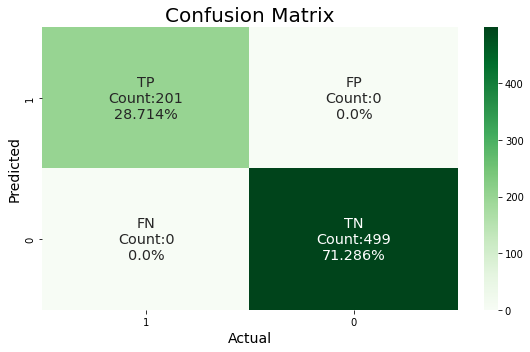

In [ ]:
confusion_heatmap(y_train,dTree.predict(X_train))

Our model is clearly overfitted.

In [ ]:
y.value_counts()

0    700
1    300
Name: default, dtype: int64

Note that default=no has 700 records and default=yes has 300 records. If we predict 'no' for every input, we will get 70% accuracy. We need a better metric for determining the performance of our model.

,Scores
Accuracy,0.656667
Precision,0.479167
Recall,0.464646
F1,0.471795


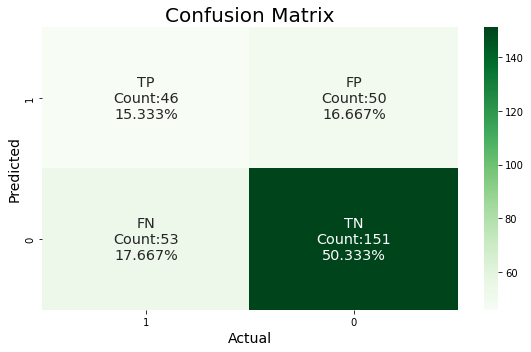

In [ ]:
confusion_heatmap(y_test,dTree.predict(X_test),show_scores=True)

Let's examine the meaning of false positives and false negatives.
* A false positive is an applicant who we predict would default on a loan but in reality they would not. The cost here is low: we lose a customer.
* A false negative is an applicant who we predict would not default but in fact does. This means we (the bank) lose money, i.e., the cost is high.

To reduce false negatives, we can assess our model performance with recall rather than accuracy.

In [ ]:
print('Training Recall:',metrics.recall_score(y_train,dTree.predict(X_train)))
print('Testing Recall:',metrics.recall_score(y_test,dTree.predict(X_test)))

Training Recall: 1.0
Testing Recall: 0.46464646464646464


Further confirmation that our model suffers from overfitting. We will work to improve the testing recall.

In [ ]:
def check_recall(model):
  train_recall=metrics.recall_score(y_train,model.predict(X_train))
  test_recall=metrics.recall_score(y_test,model.predict(X_test))
  print('Training Recall:',train_recall)
  print('Testing Recall:',test_recall)
  return (train_recall,test_recall)

In [ ]:
recall_df=pd.DataFrame(columns=['Train Recall','Test Recall'])
recall_df.loc['original']=check_recall(dTree)
recall_df

Training Recall: 1.0
Testing Recall: 0.46464646464646464


,Train Recall,Test Recall
original,1.0,0.464646


### visualizing the tree

In [ ]:
X.columns

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'amount',
       'savings_balance', 'employment_duration', 'percent_of_income',
       'years_at_residence', 'age', 'existing_loans_count', 'dependents',
       'phone', 'purpose_business', 'purpose_car', 'purpose_education',
       'purpose_furniture/appliances', 'purpose_renovations',
       'other_credit_bank', 'other_credit_none', 'other_credit_store',
       'housing_other', 'housing_own', 'housing_rent', 'job_management',
       'job_skilled', 'job_unemployed', 'job_unskilled'],
      dtype='object')

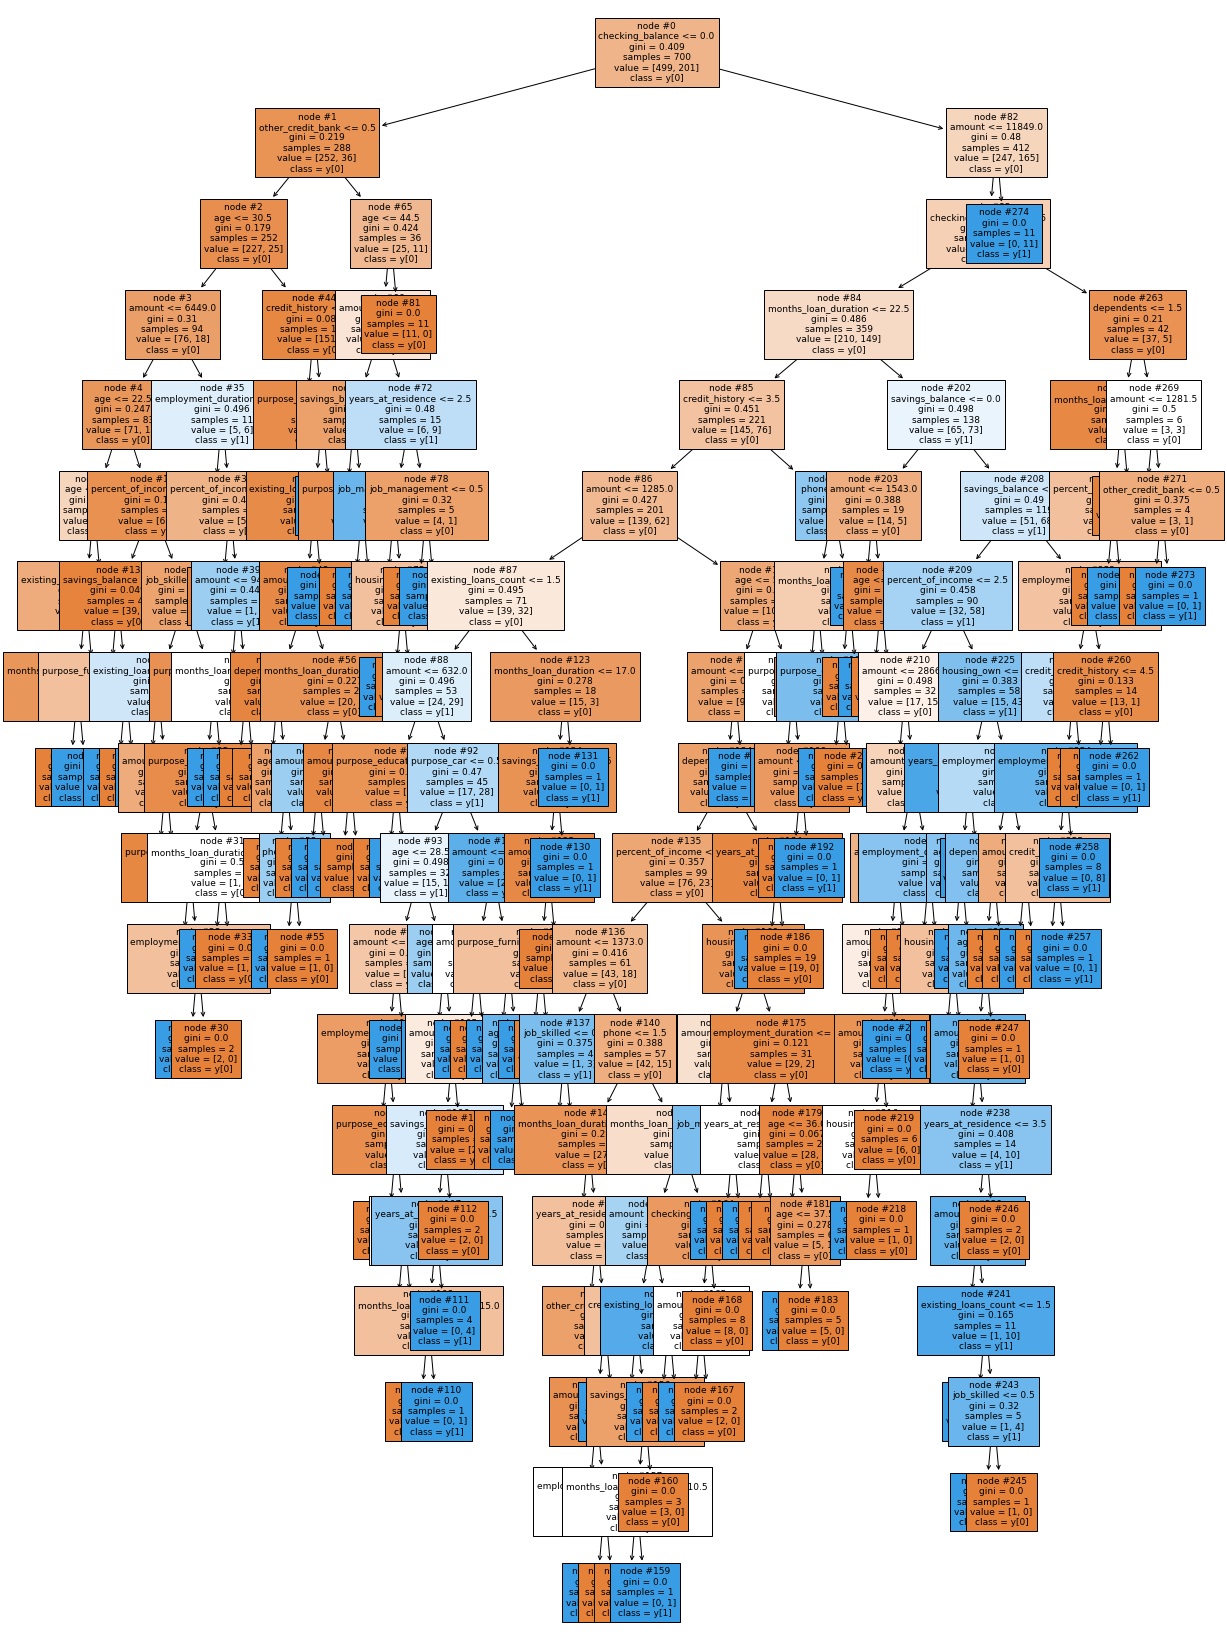

In [ ]:
plt.figure(figsize=(20,30))
tree.plot_tree(decision_tree=dTree,
               feature_names=X.columns.tolist(),
               filled=True,
               fontsize=9,
               node_ids=True,
               class_names=True)
plt.show()

In [ ]:
# list features by importance
imp=pd.Series(dTree.feature_importances_,index=X.columns.tolist())
imp=imp.sort_values(ascending=False)
print('Feature importance')
print('='*10)
imp

Feature importance


amount                          0.239170
checking_balance                0.117426
age                             0.092709
months_loan_duration            0.081129
employment_duration             0.065901
credit_history                  0.049834
savings_balance                 0.045128
years_at_residence              0.042390
existing_loans_count            0.037762
percent_of_income               0.034108
phone                           0.026504
purpose_education               0.026016
dependents                      0.021359
other_credit_bank               0.019558
job_skilled                     0.018823
housing_own                     0.018714
purpose_car                     0.018030
job_management                  0.017332
purpose_furniture/appliances    0.009306
purpose_renovations             0.007981
housing_other                   0.004653
housing_rent                    0.003490
purpose_business                0.002676
other_credit_none               0.000000
other_credit_sto

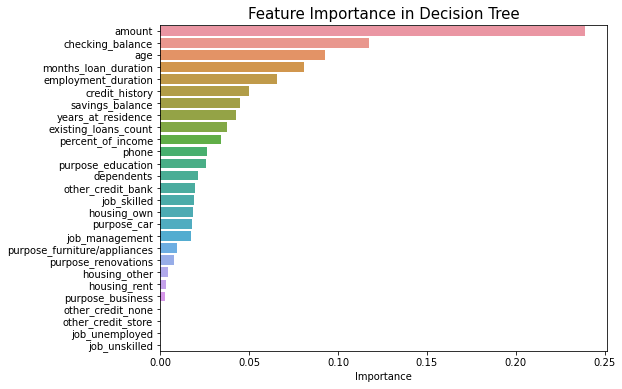

In [ ]:
# plot feature importance
plt.figure(figsize=(8,6))
plt.title('Feature Importance in Decision Tree',fontsize=15)
sns.barplot(x=imp,y=imp.index)
plt.xlabel('Importance');

## model tuning

### pre-pruning: limiting max_depth

In [ ]:
dTree1=tree.DecisionTreeClassifier(criterion='gini',
                                   max_depth=3,
                                   random_state=1)
dTree1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

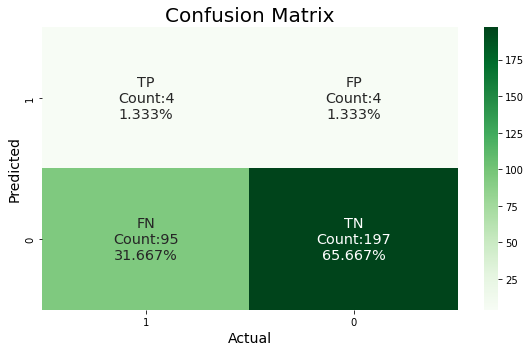

In [ ]:
confusion_heatmap(y_test,dTree1.predict(X_test))

In [ ]:
check_recall(dTree1)

Training Recall: 0.05472636815920398
Testing Recall: 0.04040404040404041


(0.05472636815920398, 0.04040404040404041)

Recall went from 45% to 46%... Not much gain!

In [ ]:
recall_df.loc['max_depth=3']=check_recall(dTree1)
recall_df

Training Recall: 0.05472636815920398
Testing Recall: 0.04040404040404041


,Train Recall,Test Recall
original,1.000000,0.464646
max_depth=3,0.054726,0.040404


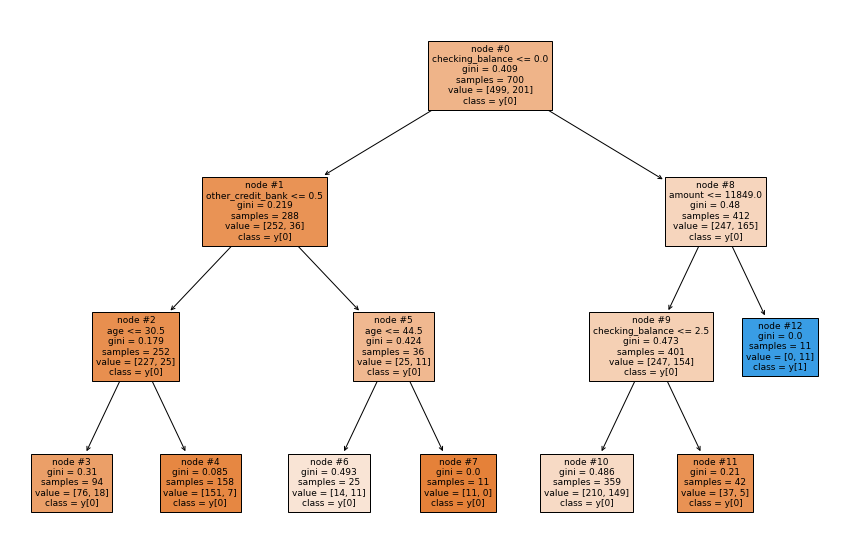

In [ ]:
plt.figure(figsize=(15,10))
tree.plot_tree(decision_tree=dTree1,
               feature_names=X.columns.tolist(),
               filled=True,
               fontsize=9,
               node_ids=True,
               class_names=True)
plt.show()

In [ ]:
# list features by importance
imp=pd.Series(dTree1.feature_importances_,index=X.columns.tolist())
imp=imp.sort_values(ascending=False)
print('Feature importance')
print('='*10)
imp

Feature importance


checking_balance                0.664484
amount                          0.167041
age                             0.113319
other_credit_bank               0.055156
purpose_furniture/appliances    0.000000
job_unemployed                  0.000000
job_skilled                     0.000000
job_management                  0.000000
housing_rent                    0.000000
housing_own                     0.000000
housing_other                   0.000000
other_credit_store              0.000000
other_credit_none               0.000000
purpose_renovations             0.000000
purpose_car                     0.000000
purpose_education               0.000000
months_loan_duration            0.000000
purpose_business                0.000000
phone                           0.000000
dependents                      0.000000
existing_loans_count            0.000000
years_at_residence              0.000000
percent_of_income               0.000000
employment_duration             0.000000
savings_balance 

Now there are very few important features, the most important being checking_balance.

### pre-pruning: GridSearch

In [ ]:
# choose classifier (model type)
search=tree.DecisionTreeClassifier(random_state=1)

# parameters to choose from
params={'max_depth':np.arange(3,7),
        'min_samples_leaf':[4,8,16,32],
        'max_leaf_nodes':np.arange(5,20,2),
        'min_impurity_decrease':[0,0.001,0.01],
        'class_weight':[None,'balanced',{0:0.3,1:0.7}]}

# designate metric for model success
#scorer=metrics.make_scorer(metrics.recall_score)

In [ ]:
# grid search with cross validation (cv) of size 5
grid_obj=GridSearchCV(estimator=search,
                      param_grid=params,
                      scoring='recall',
                      cv=5,
                      verbose=1)
# this is the part that takes a while
grid_obj.fit(X_train,y_train)

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'class_weight': [None, 'balanced', {0: 0.3, 1: 0.7}],
                         'max_depth': array([3, 4, 5, 6]),
                         'max_leaf_nodes': array([ 5,  7,  9, 11, 13, 15, 17, 19]),
                         'min_impurity_decrease': [0, 0.001, 0.01],
                         'min_samples_leaf': [4, 8, 16, 32]},
             scoring='recall', verbose=1)

In [ ]:
search=grid_obj.best_estimator_
search.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=4, max_leaf_nodes=13,
                       min_impurity_decrease=0, min_samples_leaf=8,
                       random_state=1)

In [ ]:
check_recall(search)

Training Recall: 0.8208955223880597
Testing Recall: 0.8080808080808081


(0.8208955223880597, 0.8080808080808081)

In [ ]:
recall_df.loc['GridSearchCV']=check_recall(search)
recall_df

Training Recall: 0.8208955223880597
Testing Recall: 0.8080808080808081


,Train Recall,Test Recall
original,1.000000,0.464646
max_depth=3,0.054726,0.040404
GridSearchCV,0.820896,0.808081


In [ ]:
print('Training Accuracy:',metrics.accuracy_score(y_train,search.predict(X_train)))
print('Testing Accuracy:',metrics.accuracy_score(y_test,search.predict(X_test)))

Training Accuracy: 0.6957142857142857
Testing Accuracy: 0.6666666666666666


While accuracy is lower, recall is high. We will just be a very conservative loan servicer, only granting loans to those we are confident will pay us back. We will predict that many will default who in fact wouldn't (false positives), but we will allow very few false negatives.

,Scores
Accuracy,0.666667
Precision,0.496894
Recall,0.808081
F1,0.615385


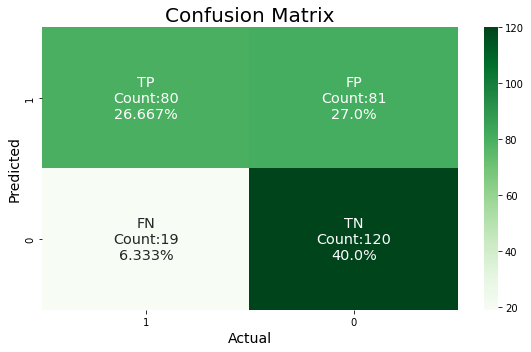

In [ ]:
confusion_heatmap(y_test,search.predict(X_test),show_scores=True)

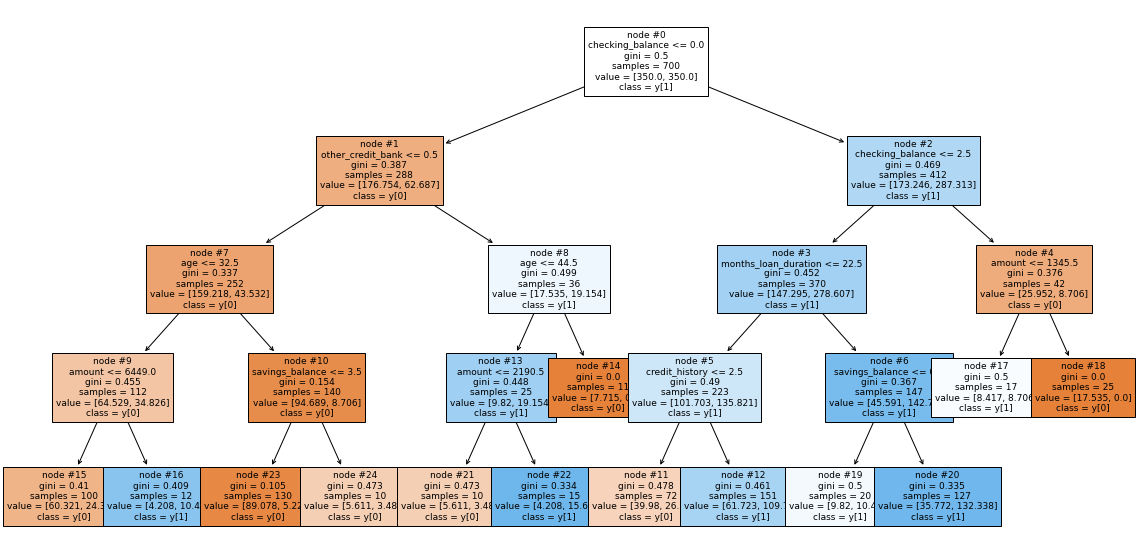

In [ ]:
plt.figure(figsize=(20,10))
tree.plot_tree(decision_tree=search,
               feature_names=X.columns.tolist(),
               filled=True,
               fontsize=9,
               node_ids=True,
               class_names=True)
plt.show()

In [ ]:
# list features by importance
imp=pd.Series(search.feature_importances_,index=X.columns.tolist())
imp=imp.sort_values(ascending=False)
print('Feature importance')
print('='*10)
imp

Feature importance


checking_balance                0.524486
age                             0.126930
amount                          0.112033
months_loan_duration            0.073866
other_credit_bank               0.059544
credit_history                  0.057993
savings_balance                 0.045147
purpose_renovations             0.000000
job_unemployed                  0.000000
job_skilled                     0.000000
job_management                  0.000000
housing_rent                    0.000000
housing_own                     0.000000
housing_other                   0.000000
other_credit_store              0.000000
other_credit_none               0.000000
purpose_car                     0.000000
purpose_furniture/appliances    0.000000
purpose_education               0.000000
purpose_business                0.000000
phone                           0.000000
dependents                      0.000000
existing_loans_count            0.000000
years_at_residence              0.000000
percent_of_incom

### gridsearch experiment

As an experiment, let's try a grid search with the same parameters, but let's score with F1 rather than recall. We will still ultimately judge the model based on recall performance, but I'm wondering if optimizing for F1 will reduce the false positive rate.

In [ ]:
# grid search with cross validation (cv) of size 5
# f1 score instead of recall
grid_obj1=GridSearchCV(estimator=search,
                      param_grid=params,
                      scoring='f1',
                      cv=5,
                      verbose=1)
# this is the part that takes a while
grid_obj1.fit(X_train,y_train)

search1=grid_obj1.best_estimator_
search1.fit(X_train,y_train)

check_recall(search1)

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits
Training Recall: 0.8059701492537313
Testing Recall: 0.7878787878787878


(0.8059701492537313, 0.7878787878787878)

,Scores
Accuracy,0.663333
Precision,0.493671
Recall,0.787879
F1,0.607004


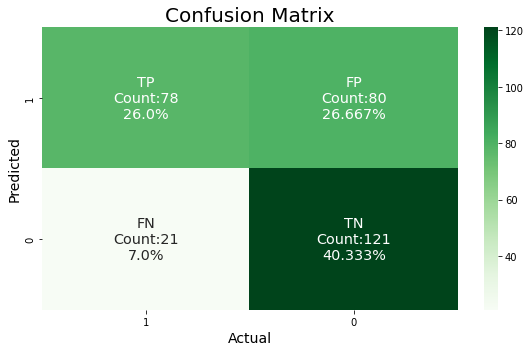

In [ ]:
confusion_heatmap(y_test,search1.predict(X_test),show_scores=True)

Recall is still exceptional, but scoring on F1 instead of recall did not really reduce the false positive rate.

### post-pruning: cost complexity

In [ ]:
clf=tree.DecisionTreeClassifier(random_state=1)
path=clf.cost_complexity_pruning_path(X_train,y_train)
path_df=pd.DataFrame(path)
path_df

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000952,0.001905
2,0.001143,0.004190
3,0.001209,0.009026
4,0.001250,0.011526
5,0.001270,0.014065
6,0.001286,0.016637
7,0.001299,0.019234
8,0.001314,0.024491
9,0.001336,0.029837


Now we can use this path to fit trees with various ccp_alphas.

In [ ]:
clfs=[]
for alp in path.ccp_alphas:
  clf=tree.DecisionTreeClassifier(ccp_alpha=alp,random_state=1)
  clf.fit(X_train,y_train)
  clfs.append(clf)

# verify that the last tree has been pruned to the root node.
print('Number of nodes in last tree:',clfs[-1].tree_.node_count)

Number of nodes in last tree: 1


We will thus exclude the last ccp_alpha, because this is the value that prunes the whole tree, leaving only the root node.

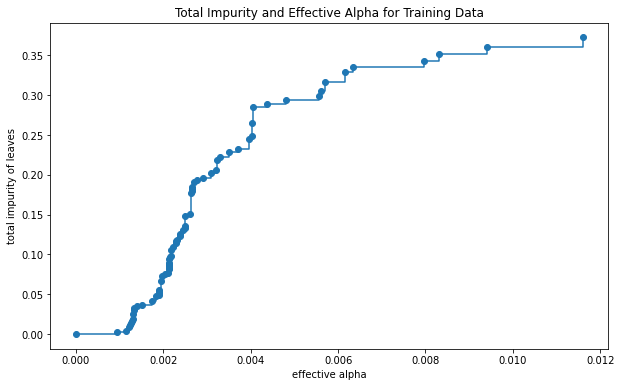

In [ ]:
fig,ax=plt.subplots(figsize=(10,6))
ax.set_title('Total Impurity and Effective Alpha for Training Data')
# exclude the last line of path with [:-1]
ax.plot(path.ccp_alphas[:-1],path.impurities[:-1], marker='o',drawstyle='steps-post')
ax.set_xlabel('effective alpha')
ax.set_ylabel('total impurity of leaves')
plt.show()

In [ ]:
clfs=clfs[:-1]
ccp_alphas=path.ccp_alphas[:-1]

node_counts=[clf.tree_.node_count for clf in clfs]
depth=[clf.tree_.max_depth for clf in clfs]

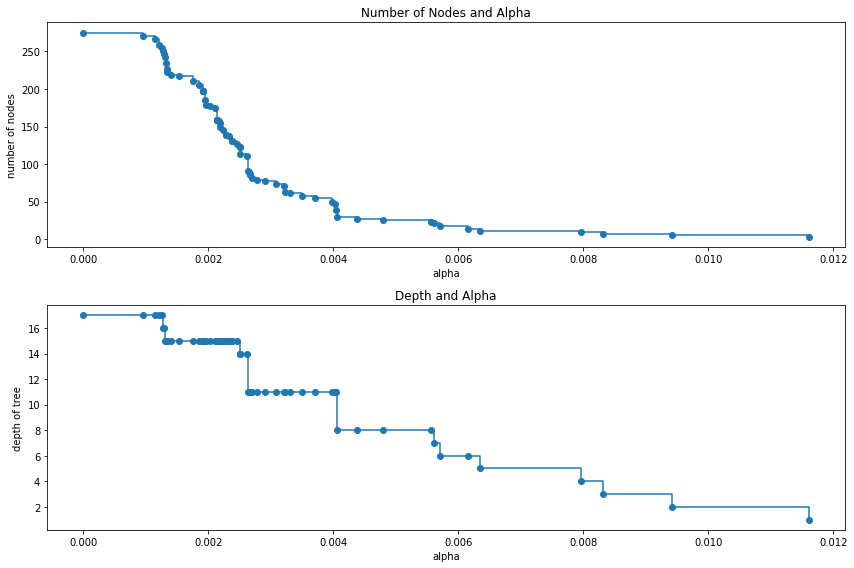

In [ ]:
fig,ax=plt.subplots(2,1,figsize=(12,8))
# node counts
ax[0].set_title('Number of Nodes and Alpha')
ax[0].plot(ccp_alphas,node_counts,marker='o',drawstyle='steps-post')
ax[0].set_xlabel('alpha')
ax[0].set_ylabel('number of nodes')
# depth
ax[1].set_title('Depth and Alpha')
ax[1].plot(ccp_alphas,depth,marker='o',drawstyle='steps-post')
ax[1].set_xlabel('alpha')
ax[1].set_ylabel('depth of tree')
# print
fig.tight_layout()

As alpha increases, both the number of nodes and the depth of the tree decreases.

In [ ]:
train_scores=[clf.score(X_train,y_train) for clf in clfs]
test_scores=[clf.score(X_test,y_test) for clf in clfs]

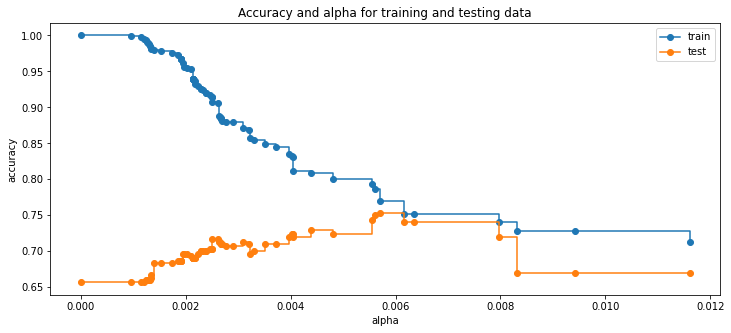

In [ ]:
fig,ax=plt.subplots(figsize=(12,5))
ax.set_title('Accuracy and alpha for training and testing data')
ax.plot(ccp_alphas,train_scores,marker='o',label='train',drawstyle='steps-post')
ax.plot(ccp_alphas,test_scores,marker='o',label='test',drawstyle='steps-post')
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.legend()
plt.show()

In [ ]:
best_idx=np.argmax(test_scores)
most_accurate_model=clfs[best_idx]

print('Training accuracy on most accurate model:',most_accurate_model.score(X_train,y_train))
print('Test accuracy on most accurate model:',most_accurate_model.score(X_test,y_test))

Training accuracy on most accurate model: 0.77
Test accuracy on most accurate model: 0.7533333333333333


In [ ]:
recall_df.loc['ccp optimal accuracy']=check_recall(most_accurate_model)
recall_df

Training Recall: 0.48258706467661694
Testing Recall: 0.5656565656565656


,Train Recall,Test Recall
original,1.000000,0.464646
max_depth=3,0.054726,0.040404
GridSearchCV,0.820896,0.808081
ccp optimal accuracy,0.482587,0.565657


Try optimizing for recall instead.

In [ ]:
train_recall=[metrics.recall_score(y_train,clf.predict(X_train)) for clf in clfs]
test_recall=[metrics.recall_score(y_test,clf.predict(X_test)) for clf in clfs]

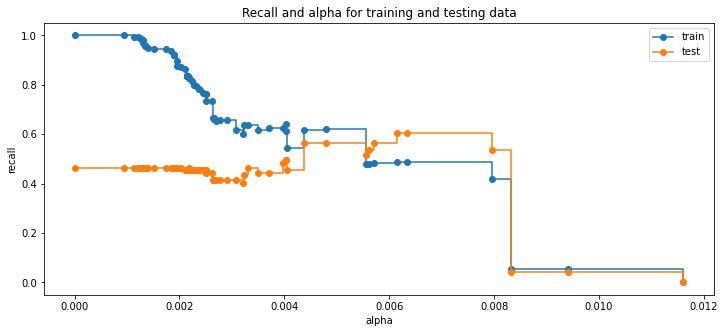

In [ ]:
fig,ax=plt.subplots(figsize=(12,5))
ax.set_title('Recall and alpha for training and testing data')
ax.plot(ccp_alphas,train_recall,marker='o',label='train',drawstyle='steps-post')
ax.plot(ccp_alphas,test_recall,marker='o',label='test',drawstyle='steps-post')
ax.set_xlabel('alpha')
ax.set_ylabel('recall')
ax.legend()
plt.show()

In [ ]:
best_idx_recall=np.argmax(test_recall)
best_recall_model=clfs[best_idx_recall]
recall_df.loc['ccp optimal recall']=check_recall(best_recall_model)
recall_df

Training Recall: 0.48756218905472637
Testing Recall: 0.6060606060606061


,Train Recall,Test Recall
original,1.000000,0.464646
max_depth=3,0.054726,0.040404
GridSearchCV,0.820896,0.808081
ccp optimal accuracy,0.482587,0.565657
ccp optimal recall,0.487562,0.606061


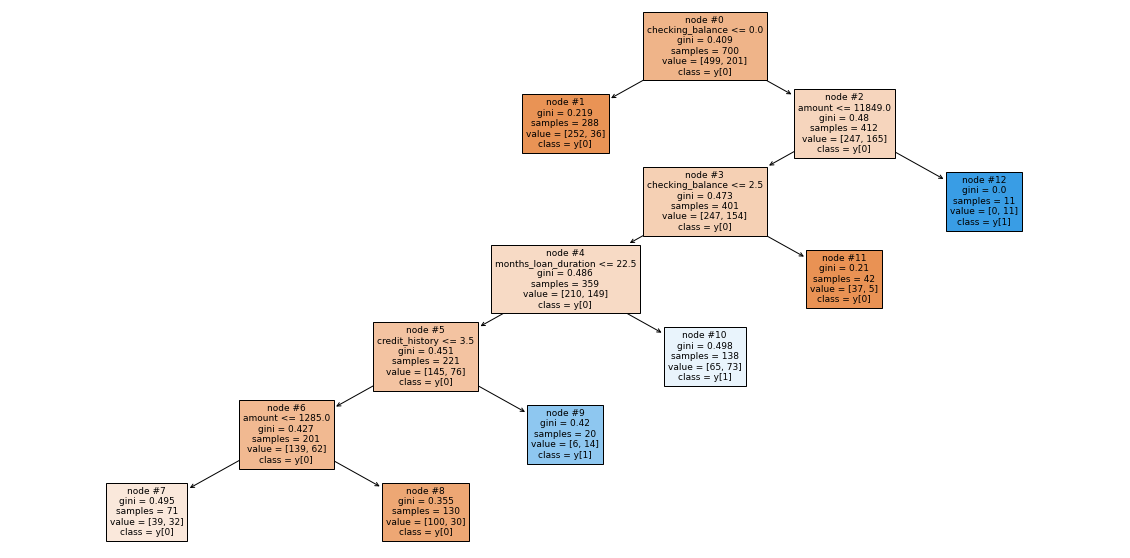

In [ ]:
plt.figure(figsize=(20,10))
tree.plot_tree(decision_tree=best_recall_model,
               feature_names=X.columns.tolist(),
               filled=True,
               fontsize=9,
               node_ids=True,
               class_names=True)
plt.show()

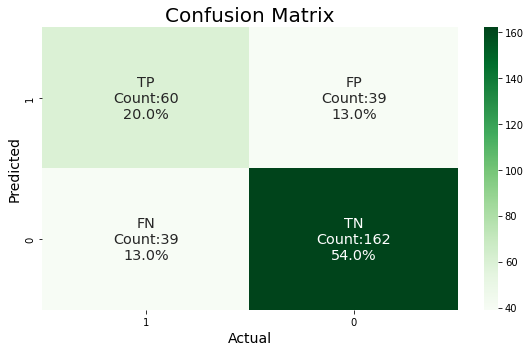

In [ ]:
confusion_heatmap(y_test,best_recall_model.predict(X_test))

## conclusion

In [ ]:
recall_df

,Train Recall,Test Recall
original,1.000000,0.464646
max_depth=3,0.054726,0.040404
GridSearchCV,0.820896,0.808081
ccp optimal accuracy,0.482587,0.565657
ccp optimal recall,0.487562,0.606061


Of the models developed here, the tree resulting from hyperparameter tuning performs best with respect to recall.

# Loan Delinquency Analysis

Problem Statement - Delinquent Analysis
Business Context
DRS bank is facing challenging times. Their NPAs (Non-Performing Assets) have been on a rise recently and a large part of these are due to the loans given to individual customers(borrowers). The Chief Risk Officer of the bank decides to put in a scientifically robust framework for approval of loans to individual customers to minimize the risk of loans converting into NPAs and initiates a project for the data science team at the bank. You, as a senior member of the team, are assigned this project.

 

Objective
The data-set aims to answer the following key questions:

To identify the criteria to approve loans for an individual customer such that the likelihood of the loan delinquency is minimized?
What are the factors that drive the behavior of loan delinquency?
 

 Data Dictionary
The data contains characteristics of the people

ID: Customer ID

isDelinquent : indicates whether the customer is delinquent or not (1 => Yes, 0 => No)

term: Loan term in months

gender: Gender of the borrower

age: Age of the borrower

purpose: Purpose of Loan

home_ownership: Status of borrower's home

FICO: FICO (i.e. the bureau score) of the borrower

In [ ]:
pd.read_csv('Loan_Delinquent_Dataset.csv')

# Machine Failure Prediction

Problem Statement - Machine Failure Prediction
Business Context
System failure is a common issue across the manufacturing industry, where a variety of machines and equipment are used. In most cases, it becomes important to be able to predict machine failures by analyzing system data and taking preventive measures to be able to tackle them. This is known as predictive maintenance and with the rising availability of data and computational resources, the use of such data-driven, proactive maintenance methods has resulted in several benefits like minimized downtime of the equipment, minimized cost associated with spares and supplies, etc.

AutoMobi Engineering Pvt. Ltd is an auto component manufacturing company. The manufacturing facility of AutoMobi consists of numerous products machined on several CNC (Computer Numerical Controlled) machines. In an attempt to transition to a data-driven maintenance process, the company had set up sensors in various locations to collect data regarding the various parameters involved in the manufacturing process. Initially, they want to try it in an injector nozzle manufacturing shop where they are manufacturing fuel injector nozzles for automobile engines using various manufacturing processes (like turning, drilling, etc). The company has been collecting data on an hourly basis from these sensors and aims to build ML-based solutions using the data to optimize cost, improve failure predictability, and minimize the downtime of equipment.

Objective
AutoMobi has recently been encountering a problem with frequent equipment failure in the fuel injector nozzle manufacture unit, leading to disturbance in the manufacturing process. They have reached out to the Data Science team for a solution and shared data for the past three months. As a member of the Data Science team, you are tasked with analyzing the data and developing a Machine Learning model to detect potential machine failures, determine the most influencing factors on machine health, and provide recommendations for cost optimization to the management.

Data Dictionary
UDI: Unique identifier ranging from 1 to 10000
Type: The type of product consisting of low(60% of all products), medium(30%), and high(10%) quality corresponding to L, M, and H
Air temperature: Ambient temperature (in the machine shop) measured in Kelvin
Process Temperature: Tool tip temperature measured in Kelvin
Rotational Speed: Rotational speed of the machine spindle measured in revolutions per minute (rpm)
Torque: Torque acting on the machine spindle measured in Newton meter (Nm)
Tool wear: Tool wear measured in micrometers (During the manufacturing process, continuous rubbing of the tool on the workpiece leads to the wearing of the tool material. The tool wear is measured as the amount of wear on the cutting face of the tool measured in micrometers)
Failure: 0-No failure, 1-Failure

In [ ]:
pd.read_csv('Predictive_Maintenance_Case_Study.csv')

In [ ]:
%%shell
jupyter nbconvert --to html ///content/Henningsen_Project_4.ipynb

[NbConvertApp] Converting notebook ///content/Henningsen_Project_4.ipynb to html
[NbConvertApp] Writing 3985758 bytes to ///content/Henningsen_Project_4.html
